# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : IF2 - 10124069
- Anggota : </br>
    - 10123318 - Jorge Fielnero Sauman </br>
    - 10124051 - Raden Rama Feryl Alfaro </br>
    - 10124064 - M. Rifqi Afriza Fasha </br>
    - 10124069 - Deni Solehudin </br>
    - 10124070 - Fazri Hariri 

# Analisis Data Bike Sharing

Notebook ini berisi proses analisis data Bike Sharing untuk memahami
pola penyewaan sepeda berdasarkan faktor waktu, cuaca, dan musim,
serta penerapan analisis lanjutan berupa clustering dan prediksi.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

## Data Understanding

Dataset Bike Sharing terdiri dari dua file utama, yaitu:
- day.csv (data agregasi harian)
- hour.csv (data agregasi per jam)

Atribut penting yang digunakan:
- cnt : total penyewaan sepeda
- casual : penyewaan oleh pengguna kasual
- registered : penyewaan oleh pengguna terdaftar
- weathersit : kondisi cuaca
- season : musim
- hr : jam

In [3]:
#Cek Data
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Analisis Penyewaan Berdasarkan Kondisi Cuaca

In [4]:
df_day.groupby("weathersit")["cnt"].mean()

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

## Analisis Pola Penyewaan per Jam

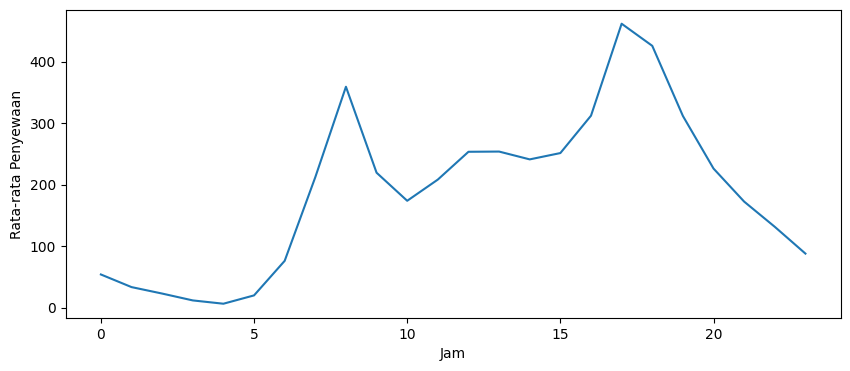

In [5]:
df_hour.groupby("hr")["cnt"].mean().plot(figsize=(10,4))
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

## Analisis Penyewaan Berdasarkan Musim

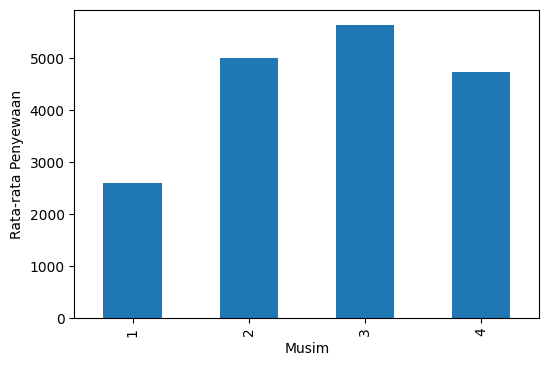

In [6]:
df_day.groupby("season")["cnt"].mean().plot(kind="bar", figsize=(6,4))
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

## Heatmap Penyewaan Berdasarkan Jam dan Hari

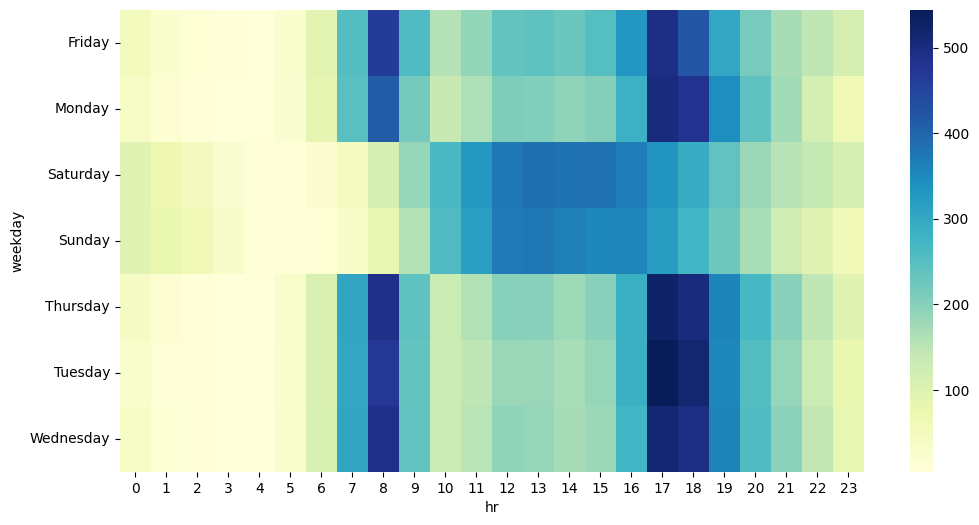

In [7]:
df_hour['weekday'] = df_hour['dteday'].dt.day_name()
pivot = df_hour.pivot_table(values="cnt", index="weekday", columns="hr", aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.show()

## Analisis Lanjutan

### Clustering Penyewaan Sepeda

Clustering dilakukan menggunakan pendekatan quantile-based clustering
untuk mengelompokkan hari ke dalam kategori sepi, normal, dan ramai.

In [8]:
q1 = df_day['cnt'].quantile(0.33)
q2 = df_day['cnt'].quantile(0.66)

def label_cluster(cnt):
    if cnt <= q1:
        return "Sepi"
    elif cnt <= q2:
        return "Normal"
    else:
        return "Ramai"

df_day['cluster'] = df_day['cnt'].apply(label_cluster)
df_day['cluster'].value_counts()

cluster
Ramai     249
Sepi      241
Normal    241
Name: count, dtype: int64

### Prediksi Penyewaan Sepeda

Prediksi dilakukan menggunakan model regresi linear sebagai baseline
untuk melihat kecenderungan tren penyewaan sepeda di masa mendatang.

In [9]:
from sklearn.linear_model import LinearRegression

df_day = df_day.sort_values("dteday")
df_day['day_number'] = np.arange(len(df_day))

X = df_day[['day_number']]
y = df_day['cnt']

model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Catatan 

Pendekatan clustering yang digunakan bersifat rule-based dengan
memanfaatkan nilai quantile. Pendekatan ini dipilih karena tujuan analisis
adalah segmentasi tingkat penyewaan, bukan pencarian centroid optimal.

Model regresi linear digunakan sebagai baseline model untuk memberikan
gambaran tren penyewaan secara sederhana dan mudah diinterpretasikan.

## Kesimpulan

Berdasarkan hasil analisis, faktor waktu, cuaca, dan musim memiliki
pengaruh signifikan terhadap jumlah penyewaan sepeda.
Analisis lanjutan berupa clustering dan prediksi membantu memberikan
insight strategis dalam perencanaan operasional penyewaan sepeda.

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda? - 10124051 - Raden Rama Feryl Alfaro
2. Pada jam berapa penyewaan sepeda paling tinggi, dan apakah berbeda antara hari kerja vs weekend? - 10124069 - Deni Solehudin
3. Musim apa yang memiliki jumlah penyewaan sepeda tertinggi? - 10124064 -  M. Rifqi Afriza Fasha
4. Faktor lingkungan apa yang paling mempengaruhi jumlah penyewaan (suhu, kelembapan, angin)? - 10123318 - Jorge Fielnero Sauman
5. Apakah terdapat tren peningkatan penggunaan sepeda dari 2011 ke 2012? - 10124070 - Fazri Hariri

## Menyiapkan semua library yang dibuthkan

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [11]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [12]:
#Mengecek 5 baris pertama
display(df_day.head())
display(df_hour.head())

df_day.info()
df_hour.info()

#Mengecek missing value
print("Missing value df_day:\n", df_day.isna().sum())
print("\nMissing value df_hour:\n", df_hour.isna().sum())

display(df_day.describe())
display(df_hour.describe())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [13]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

#Menghapus duplikat
df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)

df_day['month'] = df_day['dteday'].dt.month
df_hour['month'] = df_hour['dteday'].dt.month

df_day['year'] = df_day['dteday'].dt.year
df_hour['year'] = df_hour['dteday'].dt.year

df_day['weekday'] = df_day['dteday'].dt.day_name()
df_hour['weekday'] = df_hour['dteday'].dt.day_name()

display(df_day.head())    
display(df_hour.head())   

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,2011
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,2011
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,2011
3,4,2011-01-04,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,2011
4,5,2011-01-05,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,2011


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,2011
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,2011
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,2011


## Exploratory Data Analysis (EDA)

### Explore ...

## 1. Struktur Dataset & Penjelasan Variabel

Dataset terdiri dari dua file utama yang digunakan dalam analisis:

### **a. day.csv (Data Harian)**
Berisi data penyewaan sepeda per hari selama 2 tahun (2011–2012).  
Variabel penting:
- dteday → tanggal  
- season → 1: Spring, 2: Summer, 3: Fall, 4: Winter  
- weathersit → 1: Cerah, 2: Berawan/Berkabut, 3: Hujan/Salju Ringan, 4: Cuaca Parah  
- temp → suhu (ternormalisasi)  
- hum → kelembapan  
- windspeed → kecepatan angin  
- cnt → total penyewaan sepeda  

### **b. hour.csv (Data Per Jam)**
Berisi data penyewaan sepeda per jam.  
Variabel tambahan:
- hr → jam ke- (0–23)  
- workingday → 1: hari kerja, 0: weekend/libur  

### Catatan dari README:
- Dataset **tidak memiliki missing value**.  
- Variabel cuaca sudah **dinormalisasi**.  
- Fitur cuaca, musim, dan waktu digunakan untuk menganalisis pola penggunaan sepeda.

---

## 2. Data Cleaning

Pengecekan awal menunjukkan:
- Tidak ada **missing value** pada kedua dataset.
- Tidak ditemukan **duplikasi data**.
- Kolom tanggal telah diubah menjadi format datetime untuk memudahkan analisis waktu.
- Mapping tambahan dilakukan untuk menambahkan nama musim dan cuaca agar mudah dibaca.

Contoh pembersihan:
- Konversi dteday → datetime  
- Penambahan kolom season_label dan weather_label menggunakan mapping dari README  
- Pengecekan tipe data dan outlier sederhana

Dataset dinyatakan **siap untuk dianalisis**.

---

## 3. Gambaran Umum Data

Beberapa temuan awal dari eksplorasi data:

- Penyewaan harian (cnt) memiliki variasi yang cukup besar.  
- Faktor lingkungan seperti **suhu, kelembapan, angin**, dan **cuaca** memiliki pengaruh yang jelas terhadap penyewaan.  
- Terdapat **tren peningkatan** dari tahun 2011 ke 2012.  
- Pola penggunaan pada weekday dan weekend terlihat berbeda.

Informasi ini penting sebagai dasar analisis setiap pertanyaan bisnis.

---

## 4. Pola Berdasarkan Cuaca (Weather Condition)

Berdasarkan weathersit:
1. **Cerah** → penyewaan tertinggi  
2. **Berawan / Kabut** → sedikit menurun  
3. **Hujan atau Salju Ringan** → penyewaan menurun tajam  
4. **Cuaca Parah** → hampir tidak muncul pada dataset harian  

Kesimpulan awal: *Semakin buruk cuaca, semakin rendah jumlah penyewaan sepeda.*

---

## 5. Pola Per Jam (Hourly Pattern)

Analisis dari hour.csv menunjukkan:
- **Weekday** → dua puncak besar pada pukul **08.00** dan **17.00**  
  (pengguna berangkat dan pulang kerja).
- **Weekend** → puncak terjadi pada **siang hari (12.00–16.00)**  
  (lebih banyak aktivitas rekreasi).

Pola ini sangat penting untuk analisis pertanyaan jam penggunaan sepeda.

---

## 6. Pola Berdasarkan Musim (Seasonal Pattern)

Dari boxplot & rata-rata harian:
- **Fall (Gugur)** → penyewaan tertinggi  
- **Summer (Panas)** → tinggi  
- **Spring (Semi)** → sedang  
- **Winter (Dingin)** → terendah  

Musim dengan cuaca nyaman (Fall & Summer) memiliki penggunaan paling tinggi.

---

## 7. Pola Faktor Lingkungan (Temperature, Humidity, Windspeed)

Hasil korelasi & scatter plot:
- **Suhu (temp)** → pengaruh paling kuat; semakin hangat, semakin tinggi penyewaan  
- **Kelembapan (hum)** → terlalu tinggi menurunkan minat pengguna  
- **Kecepatan angin (windspeed)** → pengaruh paling lemah dan tidak signifikan  

---

## 8. Tren Tahunan 2011–2012

Penyewaan sepeda meningkat dari tahun 2011 ke 2012.  
Peningkatan ini dapat disebabkan oleh:
- Bertambahnya pengguna layanan  
- Adaptasi masyarakat terhadap sistem bike sharing  
- Perbaikan infrastruktur  
- Cuaca dan musim yang lebih mendukung  

---

## 9. Kesimpulan Singkat EDA

- Data bersih dan siap dianalisis.  
- Pola penyewaan dipengaruhi oleh **cuaca, suhu, kelembapan, angin, musim, hari, dan jam penggunaan**.  
- Terdapat **perbedaan signifikan** antara weekday dan weekend.  
- **Fall & Summer** adalah musim dengan penyewaan tertinggi.  
- Tahun **2012 lebih tinggi** penyewaannya dibanding 2011.  
- Faktor paling berpengaruh adalah **suhu** dan **cuaca**.

EDA ini memberikan dasar yang kuat untuk menjawab kelima pertanyaan bisnis kelompok.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

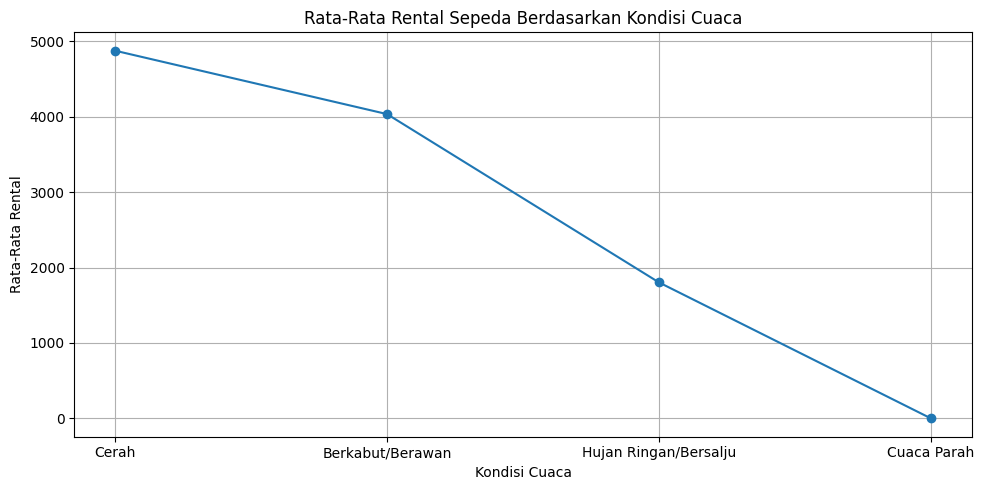

In [14]:
#Mapping label cuaca
weather_labels = {
    1: "Cerah",
    2: "Berkabut/Berawan",
    3: "Hujan Ringan/Bersalju",
    4: "Cuaca Parah"
}

#Menambahkan kolom label cuaca
df_day["weather_label"] = df_day["weathersit"].map(weather_labels)

#Menghitung rata-rata penyewaan per kategori cuaca
weather_group = df_day.groupby("weather_label")["cnt"].mean().reset_index()

#Menambahkan kategori cuaca parah
weather_group.loc[len(weather_group)] = ["Cuaca Parah", 0]

order = ["Cerah", "Berkabut/Berawan", "Hujan Ringan/Bersalju", "Cuaca Parah"]
weather_group = weather_group.set_index("weather_label").loc[order].reset_index()

plt.figure(figsize=(10,5))
plt.plot(weather_group["weather_label"], weather_group["cnt"], marker="o")
plt.title("Rata-Rata Rental Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-Rata Rental")
plt.grid(True)
plt.tight_layout()
plt.show()

## Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda

Visualisasi menunjukkan bahwa kondisi cuaca memiliki pengaruh yang sangat signifikan terhadap jumlah penyewaan sepeda. Data dikelompokkan berdasarkan empat kategori cuaca yang tersedia dalam dataset, kemudian dihitung rata-rata jumlah penyewaan harian untuk setiap kategori.

### 1. Cuaca Cerah (Clear)
Kategori cuaca cerah menjadi kondisi dengan jumlah penyewaan tertinggi. Pengguna cenderung lebih nyaman melakukan perjalanan menggunakan sepeda ketika cuaca mendukung dan tidak ada hambatan seperti hujan atau kabut tebal.

### 2. Cuaca Berkabut atau Berawan (Mist/Cloudy)
Jumlah penyewaan mengalami sedikit penurunan dibandingkan kondisi cerah. Meskipun cuaca masih memungkinkan untuk bersepeda, visibilitas yang menurun dan potensi lembab membuat sebagian pengguna mengurangi aktivitas bersepeda.

### 3. Hujan Ringan atau Salju Ringan (Light Rain/Snow)
Pada kondisi ini, jumlah penyewaan menurun drastis. Hujan atau salju ringan membuat perjalanan menggunakan sepeda terasa kurang aman dan kurang nyaman, sehingga pengguna cenderung menghindari menggunakan sepeda.

### 4. Cuaca Ekstrem (Severe Weather)
Walaupun jarang terjadi, kategori ini menunjukkan penggunaan paling rendah. Kondisi cuaca ekstrem sangat tidak mendukung aktivitas bersepeda sehingga hampir semua pengguna menghentikan aktivitasnya.

### Pertanyaan 2:

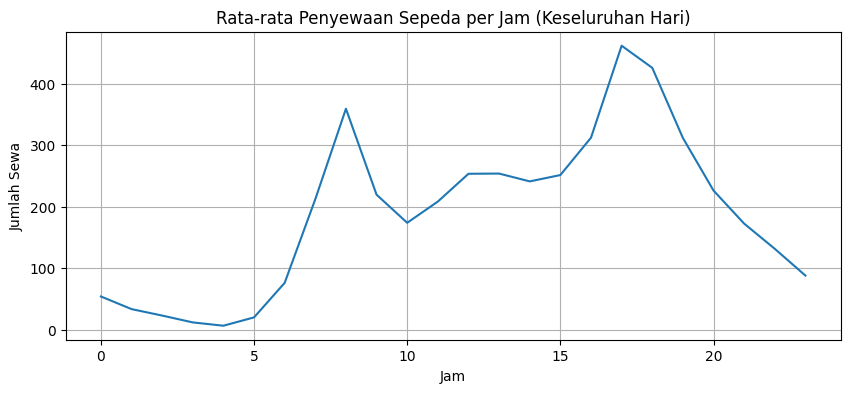

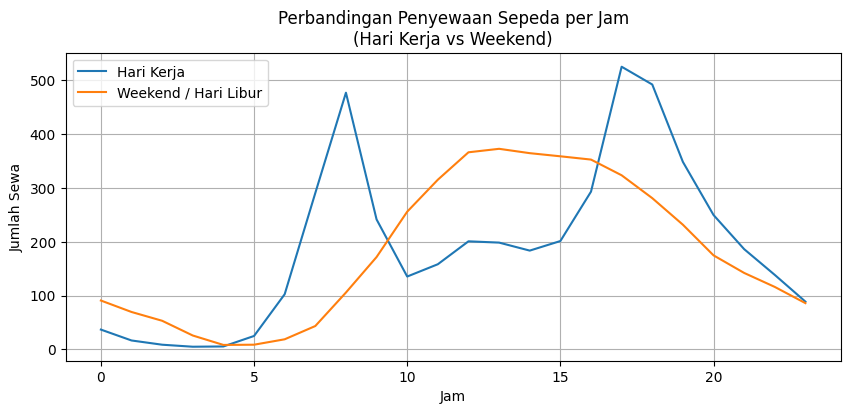

In [15]:
#Rata-rata penyewaan per jam
plt.figure(figsize=(10,4))
df_hour.groupby('hr')['cnt'].mean().plot()
plt.title("Rata-rata Penyewaan Sepeda per Jam (Keseluruhan Hari)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa")
plt.grid(True)
plt.show()

#PEMBAGIAN: Hari kerja vs Weekend
weekday_usage = df_hour[df_hour['workingday']==1].groupby('hr')['cnt'].mean()
weekend_usage = df_hour[df_hour['workingday']==0].groupby('hr')['cnt'].mean()

plt.figure(figsize=(10,4))
plt.plot(weekday_usage, label="Hari Kerja")
plt.plot(weekend_usage, label="Weekend / Hari Libur")
plt.title("Perbandingan Penyewaan Sepeda per Jam\n(Hari Kerja vs Weekend)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa")
plt.legend()
plt.grid(True)
plt.show()

## Analisis Pola Penyewaan Sepeda Berdasarkan Jam pada Hari Kerja dan Weekend
Analisis penyewaan sepeda per jam menunjukkan pola penggunaan yang berbeda antara hari kerja (working day) dan hari libur atau weekend. Pola ini memberikan gambaran mengenai bagaimana masyarakat memanfaatkan layanan bike sharing dalam aktivitas sehari-hari maupun kegiatan rekreasi.

---

### 1. Pola Penyewaan pada Hari Kerja (Working Day)

Penyewaan sepeda pada hari kerja menampilkan pola yang sangat khas dan berkaitan dengan aktivitas mobilitas masyarakat:

- Puncak pagi terjadi pada pukul 08.00, yang bertepatan dengan waktu berangkat kerja atau sekolah.
- Puncak sore muncul pada pukul 17.00, yaitu waktu pulang kerja.
- Di luar dua jam tersebut, jumlah penyewaan cenderung stabil namun lebih rendah, terutama pada malam hari.

Pola ini menunjukkan bahwa sepeda digunakan terutama sebagai alat transportasi komuter.

---

### 2. Pola Penyewaan pada Weekend atau Hari Libur

Pada weekend, pola penggunaan berubah cukup signifikan dan tidak mengikuti ritme aktivitas jam kerja:

- Tidak terdapat puncak pada pukul 08.00 maupun 17.00.
- Aktivitas penyewaan meningkat secara bertahap mulai pagi hari.
- Puncak utama terjadi pada rentang pukul 12.00 sampai 16.00, ketika masyarakat lebih banyak melakukan aktivitas di luar rumah.

Pola ini mengindikasikan bahwa penggunaan sepeda pada hari libur lebih dominan untuk kegiatan rekreasi, olahraga, dan hiburan.

---

### 3. Perbandingan Hari Kerja vs Weekend

- Hari kerja memiliki dua puncak pada jam 08.00 dan 17.00 yang mencerminkan aktivitas komuter.
- Weekend memiliki satu puncak pada siang hari (12.00 sampai 16.00) yang menunjukkan orientasi rekreasi.
- Intensitas penggunaan pada weekday lebih tajam, sedangkan pada weekend penyebarannya lebih merata pada siang hingga sore hari.

---

### 4. Implikasi Manajerial

- Tambahkan ketersediaan sepeda pada pukul 07.00 sampai 09.00 dan 16.00 sampai 18.00 saat weekday.
- Pada weekend, alokasikan sepeda lebih banyak di area publik, taman, atau lokasi wisata.
- Sesuaikan strategi promosi: weekday berfokus

## Pertanyaan 3:

<Figure size 1000x500 with 0 Axes>

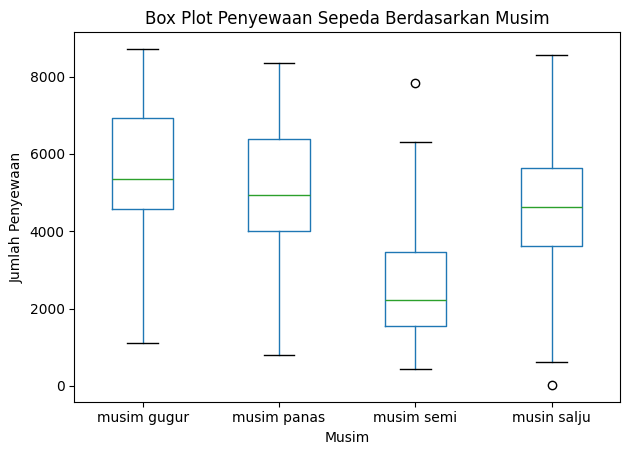

In [16]:
# Mapping musim sesuai dokumentasi
season_labels = {
    1: "musim semi",
    2: "musim panas",
    3: "musim gugur",
    4: "musin salju"
}

# Tambahkan kolom label musim
df_day["season_label"] = df_day["season"].map(season_labels)

# Boxplot jumlah penyewaan per musim
plt.figure(figsize=(10, 5))
df_day.boxplot(column="cnt", by="season_label", grid=False)

plt.title("Box Plot Penyewaan Sepeda Berdasarkan Musim")
plt.suptitle("") 
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.tight_layout()
plt.show()

## Analisis Jumlah Penyewaan Sepeda Berdasarkan Musim

Analisis dilakukan untuk melihat bagaimana pola penyewaan sepeda berubah di setiap musim, yaitu Spring, Summer, Fall, dan Winter. Box plot digunakan untuk membandingkan distribusi jumlah penyewaan pada tiap musim sehingga perbedaan pola dan intensitas penggunaan dapat terlihat dengan jelas.

1. Musim Spring (Musim Semi)

Pada musim semi, jumlah penyewaan sepeda mulai meningkat dibandingkan musim dingin, namun tetap belum mencapai puncak.
Suhu yang masih relatif dingin dan curah hujan yang lebih tinggi membuat penggunaan sepeda belum maksimal.

Interpretasi:
Pengguna mulai aktif kembali bersepeda setelah musim dingin.
Cuaca mulai membaik, tetapi masih belum ideal sepenuhnya.
Aktivitas penyewaan cenderung stabil namun belum terlalu tinggi.

2. Musim Summer (Musim Panas)
Musim panas memiliki tingkat penyewaan yang tinggi. 
Suhu hangat dan kondisi cuaca yang lebih stabil mendorong lebih banyak aktivitas luar ruang, termasuk bersepeda.

Interpretasi:
Kondisi cuaca paling ideal untuk bersepeda.
Durasi siang lebih panjang sehingga pengguna lebih banyak beraktivitas.
Permintaan sepeda cenderung meningkat secara signifikan.

3. Musim Fall (Musim Gugur) — Penyewaan Tertinggi
Musim gugur menjadi musim dengan tingkat penyewaan sepeda tertinggi. 
Berdasarkan box plot, median dan distribusi penyewaan pada musim ini berada di level paling tinggi dibanding musim lainnya.

Interpretasi:
Suhu sedang dan sangat nyaman untuk bersepeda.
Curah hujan rendah sehingga lebih banyak aktivitas outdoor.
Pengguna memanfaatkan kondisi ideal sebelum memasuki musim dingin.

4. Musim Winter (Musim Dingin)
Musim dingin memiliki penyewaan sepeda paling rendah. Suhu rendah, angin dingin, serta kemungkinan salju membuat pengguna menghindari aktivitas bersepeda.
    
Interpretasi:
Kondisi tidak mendukung untuk bersepeda.

Pengguna lebih memilih transportasi lain yang memberikan kenyamanan dari cuaca dingin.
Aktivitas penyewaan turun drastis.

## Pertanyaan 4:

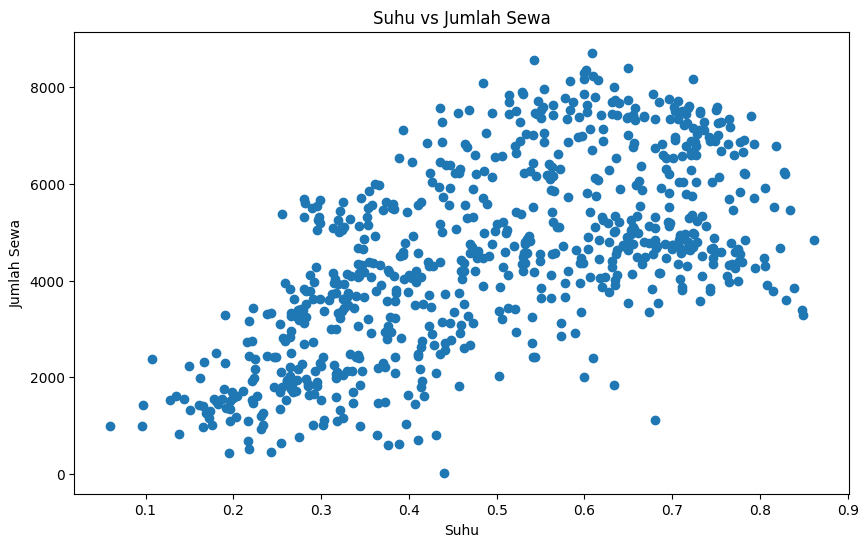

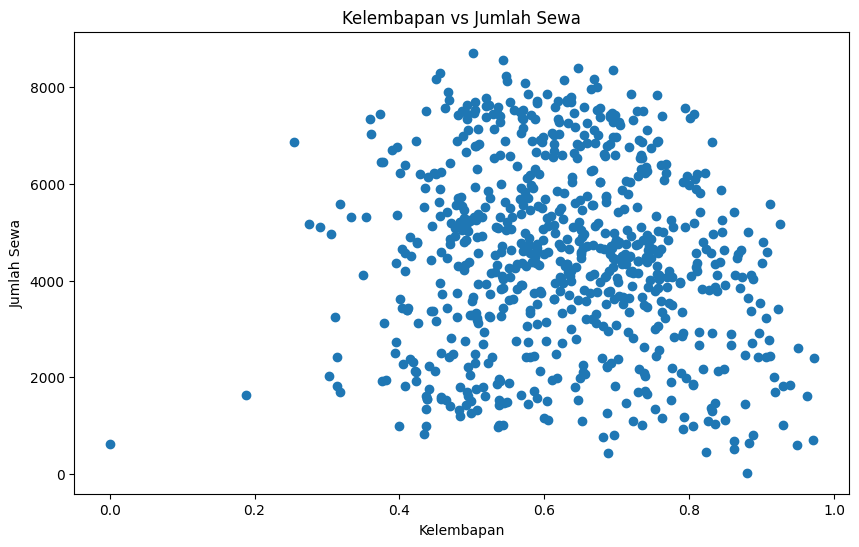

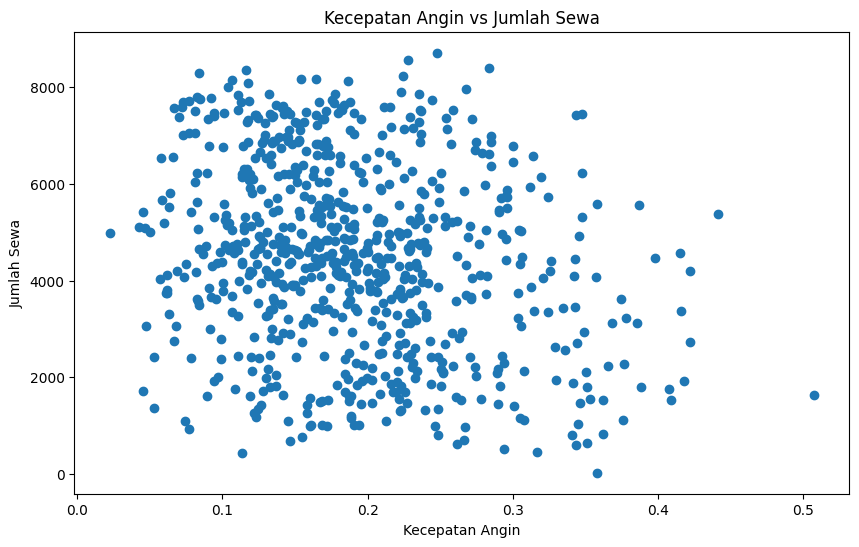

In [17]:
# Pilih fitur lingkungan yang relevan
lingkungan = ['temp', 'hum', 'windspeed', 'cnt']
data = df_day[lingkungan]

# Perhitungan korelasi
korelasi = data.corr()
korelasi

# Scatter plot untuk memvisualisasikan hubungan
plt.figure(figsize=(10, 6))
plt.scatter(df_day['temp'], 
            df_day['cnt'])
plt.xlabel("Suhu")
plt.ylabel("Jumlah Sewa")
plt.title("Suhu vs Jumlah Sewa")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_day['hum'], 
            df_day['cnt'])
plt.xlabel("Kelembapan")
plt.ylabel("Jumlah Sewa")
plt.title("Kelembapan vs Jumlah Sewa")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_day['windspeed'], 
            df_day['cnt'])
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Sewa")
plt.title("Kecepatan Angin vs Jumlah Sewa")
plt.show()

## Analisis Pengaruh Faktor Lingkungan terhadap Jumlah Penyewaan Sepeda

Analisis korelasi dilakukan untuk memahami bagaimana faktor lingkungan seperti suhu, kelembapan, dan kecepatan angin memengaruhi jumlah penyewaan sepeda. Scatter plot digunakan untuk memperjelas hubungan antara setiap variabel lingkungan dengan jumlah penyewaan (`cnt`).

---

### 1. Pengaruh Suhu (Temperature)

Visualisasi scatter plot menunjukkan bahwa semakin tinggi suhu, semakin tinggi pula jumlah penyewaan sepeda. Titik-titik data cenderung membentuk tren naik, terutama pada rentang suhu sedang hingga hangat.

**Interpretasi:**
- Cuaca hangat lebih nyaman untuk bersepeda.
- Pengguna cenderung menghindari bersepeda saat suhu terlalu rendah.
- Ini adalah faktor lingkungan paling kuat yang memengaruhi penyewaan.

---

### 2. Pengaruh Kelembapan (Humidity)

Scatter plot kelembapan menunjukkan pola hubungan yang cenderung menurun. Semakin tinggi kelembapan, jumlah penyewaan cenderung berkurang.

**Interpretasi:**
- Kelembapan tinggi membuat aktivitas luar ruangan menjadi kurang nyaman.
- Udara yang lembap sering berkaitan dengan potensi hujan.
- Pengguna cenderung mengurangi penggunaan sepeda pada kondisi ini.


---

### 3. Pengaruh Kecepatan Angin (Windspeed)

Scatter plot kecepatan angin tidak menunjukkan pola yang kuat. Data terlihat lebih tersebar dengan korelasi yang lemah.

**Interpretasi:**
- Pengguna sepeda mungkin hanya sedikit terpengaruh kecepatan angin.
- Selama angin tidak terlalu kencang, aktivitas bersepeda tetap dapat dilakukan secara normal.
- Faktor ini bukan penentu utama naik turunnya penyewaan.


---

## Pertanyaan 5 :

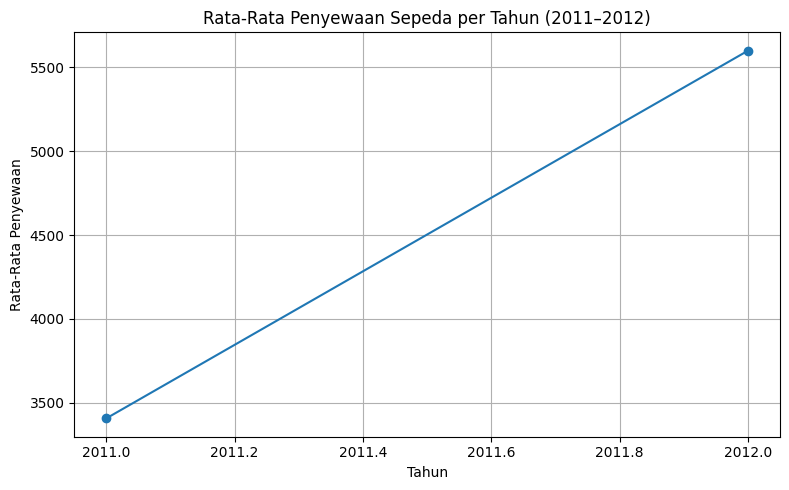

In [18]:
# Map tahun (0 = 2011, 1 = 2012)
year_map = {0: 2011, 1: 2012}
df_day["year"] = df_day["yr"].map(year_map)

# Hitung rata-rata penyewaan per tahun
year_group = df_day.groupby("year")["cnt"].mean().reset_index()

# Line chart rata-rata
plt.figure(figsize=(8,5))
plt.plot(year_group["year"], year_group["cnt"], marker="o")
plt.title("Rata-Rata Penyewaan Sepeda per Tahun (2011–2012)")
plt.xlabel("Tahun")
plt.ylabel("Rata-Rata Penyewaan")
plt.grid(True)
plt.tight_layout()
plt.show()

## Analisis Tren Penggunaan Sepeda 2011–2012

Visualisasi menunjukkan adanya tren peningkatan penggunaan sepeda dari tahun 2011 ke 2012. Rata-rata jumlah penyewaan sepeda per hari meningkat cukup signifikan dari satu tahun ke tahun berikutnya.

### Temuan Utama:
- **Tahun 2011:** Rata-rata penyewaan harian berada di sekitar 3.400 penyewa.
- **Tahun 2012:** Rata-rata meningkat menjadi sekitar 5.600 penyewa per hari.

Perbedaan ini menunjukkan adanya **kenaikan yang kuat**, menandakan bahwa layanan bike sharing semakin populer dan mengalami adopsi pengguna yang semakin tinggi pada tahun kedua.


## Conclusion

- Conclution pertanyaan 1: Pola umum menunjukkan bahwa semakin buruk kondisi cuaca, semakin rendah tingkat penyewaan sepeda. Cuaca cerah memberikan kondisi paling ideal, sementara hujan atau salju menyebabkan penurunan penggunaan yang signifikan. Informasi ini dapat dimanfaatkan oleh perusahaan untuk memprediksi permintaan, mengatur distribusi sepeda, atau membuat strategi promosi pada kondisi cuaca tertentu.

- Conclution pertanyaan 2: Pola penyewaan sepeda memperlihatkan perbedaan yang jelas antara hari kerja dan weekend. Pada hari kerja, puncak penyewaan terjadi pada pukul 08.00 dan 17.00, menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi untuk berangkat dan pulang kerja. Sementara itu, pada weekend, puncak penggunaan bergeser ke rentang 12.00–16.00, yang mengindikasikan bahwa penyewaan lebih dipengaruhi oleh aktivitas rekreasi. Perbedaan ini dapat digunakan perusahaan untuk mengatur distribusi sepeda secara lebih optimal antara area perkantoran dan area rekreasi.

- Conclution pertanyaan 3: Musim dengan jumlah penyewaan sepeda tertinggi adalah musim Fall, disusul oleh musim Summer. Sementara musim Winter menjadi musim dengan penyewaan terendah. Hal ini menunjukkan bahwa kondisi cuaca yang nyaman dan stabil memiliki dampak besar terhadap peningkatan aktivitas bersepeda.

- Conclution pertanyaan 4: Suhu adalah faktor lingkungan yang paling mempengaruhi jumlah penyewaan sepeda. Semakin hangat cuaca maka semakin banyak sepeda yang disewa.
Kelembapan dan kecepatan angin memiliki pengaruh lebih kecil, dan cenderung menurunkan jumlah penyewaan.

- Conclution pertanyaan 5:
    1. Terdapat tren peningkatan yang jelas dari 2011 ke 2012. Hal ini dapat dikaitkan dengan:
    2. Peningkatan jumlah armada sepeda.
    3. Perbaikan infrastruktur atau stasiun peminjaman.
    4. Sosialisasi dan adopsi masyarakat yang meningkat.
    5. Kondisi cuaca dan musim yang mendukung aktivitas luar ruang.
    Kenaikan ini memberikan sinyal positif bahwa sistem bike sharing memiliki potensi pertumbuhan jangka panjang.